# Analyzing IPL data from 2008 to 2024.

In [87]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [88]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Understanding data :
we have 2 files here

matches.csv : this file contains details about each match. Which team played whom, on what day, which ground, winners, player of match, umpires , season, venue etc etc. 

deliveries.csv: this file contains details about each ball bowled in IPL history till 2020 season. it contains all the details related to each delivery. How many runs were score, who score the run, bowlers name, runs score, extra runs, fall of wicket, fielder, season, innings etc.

In [89]:
matches.shape

(1095, 20)

In [90]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [91]:
deliveries.shape

(260920, 17)

In [92]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [93]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [94]:
#Adding a Season Column to matches dataset using data time object
matches['date'] = pd.to_datetime(matches.date)
matches['Season']= matches.date.dt.year
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Season
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,2008


In [95]:
deliveries.head()

,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


--------------------------

# DATA CLEANING

Data cleaning of matches.csv

In [96]:
print("Missing Values in Each Column:")
print(matches.isnull().sum())

Missing Values in Each Column:
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
Season                0
dtype: int64


In [97]:
#finding null values in City column
matches[matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Season
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi,2014
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,...,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary,2014
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,...,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni,2014
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,...,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus,2014
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Kings XI Punjab,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi,2014
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,...,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni,2014
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,...,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi,2014
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,...,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus,2014
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,...,Delhi Daredevils,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni,2014


In [98]:
#Filling null cities with respective city 
matches.loc[matches.venue =="Sharjah Cricket Stadium" , 'city'] = 'Sharjah'
matches.loc[matches.venue =="Dubai International Cricket Stadium" , 'city'] = 'Dubai'

In [99]:
matches[matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Season
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,...,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker,2011
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak,2015
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,...,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan,2015
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe,2019
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,...,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan,2023


In [100]:
#Handling null values in winner column
matches.loc[matches.winner.isna(),'winner'] = 'No_Winner'

#Handling null values in player_of_match column
matches.loc[matches.player_of_match.isna(), 'player_of_match'] = "No_player_of_the_Match"

matches.loc[matches['result'].isna() , 'winner'] = 'No winner'

In [101]:
#Now we will replace team name that are mentioned wrong
matches.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)
matches.replace('Rising Pune Supergiants' , 'Pune Warriors' , inplace = True)

In [102]:
matches.replace('Delhi Daredevils' , 'Delhi Capitals' , inplace = True)
matches.replace('Royal Challengers Bangalore' , 'Royal Challengers Bengaluru' , inplace = True)
matches.replace('Kings XI Punjab' , 'Punjab Kings' , inplace = True)

In [103]:
matches.team1.value_counts()

team1
Royal Challengers Bengaluru    144
Chennai Super Kings            128
Delhi Capitals                 126
Punjab Kings                   123
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Sunrisers Hyderabad             86
Deccan Chargers                 39
Pune Warriors                   37
Lucknow Super Giants            23
Gujarat Titans                  21
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [104]:
#Now we will drop method column bcz it have many null values and we can ignore it.
matches.drop('method', axis=1, inplace=True)

#Here we handle null values in result_margin & eliminator column
matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21480\4219154874.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Margin' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'


In [105]:
# Fill missing values and assign back to the column
matches['target_runs'] = matches['target_runs'].fillna(0)
matches['target_overs'] = matches['target_overs'].fillna(0)

In [106]:
print("Cleaned Matches DataFrame Info:")
print(matches.info())

Cleaned Matches DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1095 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   object        
 14  target_r

Data cleaning is done for matches.csv.
Now deliveries.csv dataset will be cleaned 

In [107]:
print("Missing Values in Each Column:")
print(deliveries.isnull().sum())

Missing Values in Each Column:
id                       0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [108]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('N/A')
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('N/A')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('N/A')
deliveries['fielder'] = deliveries['fielder'].fillna('N/A')

In [109]:
deliveries.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)
deliveries.replace('Rising Pune Supergiants' , 'Pune Warriors' , inplace = True)
deliveries.replace('Delhi Daredevils' , 'Delhi Capitals' , inplace = True)
deliveries.replace('Royal Challengers Bangalore' , 'Royal Challengers Bengaluru' , inplace = True)
deliveries.replace('Kings XI Punjab' , 'Punjab Kings' , inplace = True)

In [110]:
print("Cleaned Deliveries DataFrame Info:")
print(deliveries.info())

Cleaned Deliveries DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fie

NOW OUR DATA IS CLEANED ,
WE REMOVED THE NAN VALUES THAT CAN EFFECT OUR ANALYSIS

----------

# IPL EDA: Player and Team Performance Analysis
----------------
# Player Performance
# 1.Top Run Scorers

In [111]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batsmen

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

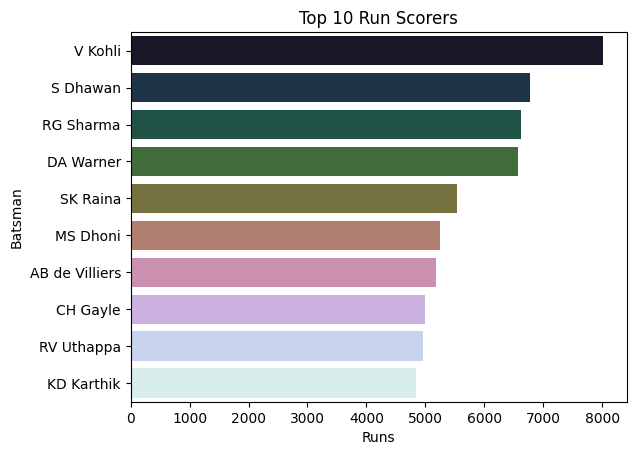

In [112]:
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, hue=top_batsmen.index, palette="cubehelix", dodge=False, legend=False)
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()

# 2. Batting Strike Rates

In [113]:
batsman_strike_rate = deliveries.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'})
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['batsman_runs'] / batsman_strike_rate['ball']) * 100
best_strike_rate = batsman_strike_rate[batsman_strike_rate['ball'] >= 200].sort_values('strike_rate', ascending=False).head(10)
best_strike_rate


,batsman_runs,ball,strike_rate
batter,,,
PD Salt,653,385,169.610390
T Stubbs,405,239,169.456067
TM Head,772,458,168.558952
AD Russell,2488,1515,164.224422
H Klaasen,993,613,161.990212
TH David,659,417,158.033573
SP Narine,1534,984,155.894309
Shashank Singh,423,272,155.514706
N Pooran,1769,1143,154.768154


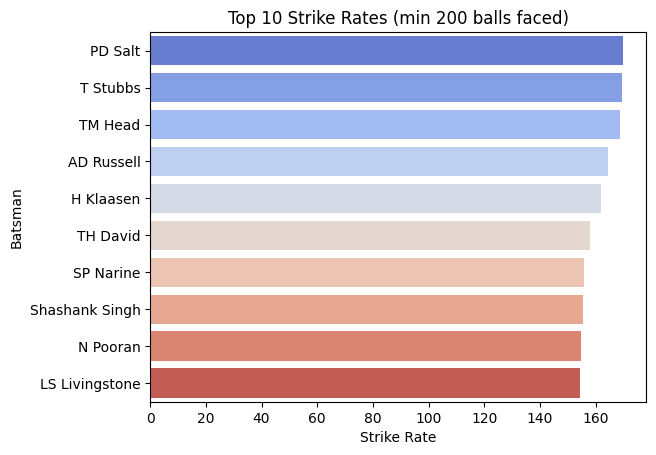

In [114]:
sns.barplot(
    x=best_strike_rate['strike_rate'],
    y=best_strike_rate.index,
    hue=best_strike_rate.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)

plt.title("Top 10 Strike Rates (min 200 balls faced)")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.show()

# 3. Most Wickets Taken

In [115]:
wicket_data = deliveries[deliveries['is_wicket'] == 1]
top_bowlers = wicket_data['bowler'].value_counts().head(10)
top_bowlers

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: count, dtype: int64

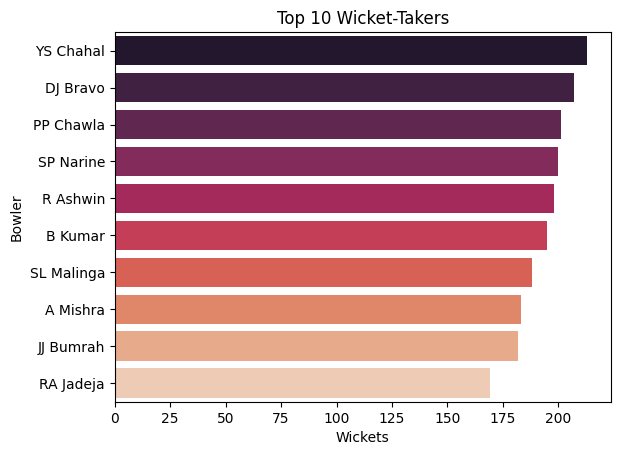

In [116]:
sns.barplot(
    x=top_bowlers.values,
    y=top_bowlers.index,
    hue=top_bowlers.index,
    palette="rocket",
    dodge=False,
    legend=False
)
plt.title("Top 10 Wicket-Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()

# 4. Bowling Economy Rates

In [117]:
bowler_stats = deliveries.groupby('bowler').agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count'),
    wickets=('is_wicket', 'sum')
)
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / (bowler_stats['balls_bowled'] / 6))
bowler_stats = bowler_stats[bowler_stats['balls_bowled'] >= 120]
top_economy = bowler_stats.sort_values(by='economy').head(10)
top_economy

,runs_conceded,balls_bowled,wickets,economy
bowler,,,,
Sohail Tanvir,275,265,24,6.226415
A Chandila,245,234,11,6.282051
FH Edwards,160,150,6,6.400000
SMSM Senanayake,211,195,9,6.492308
SM Pollock,307,280,13,6.578571
A Kumble,1089,983,49,6.646999
GD McGrath,366,329,14,6.674772
M Muralitharan,1765,1581,67,6.698292
IS Sodhi,204,182,9,6.725275


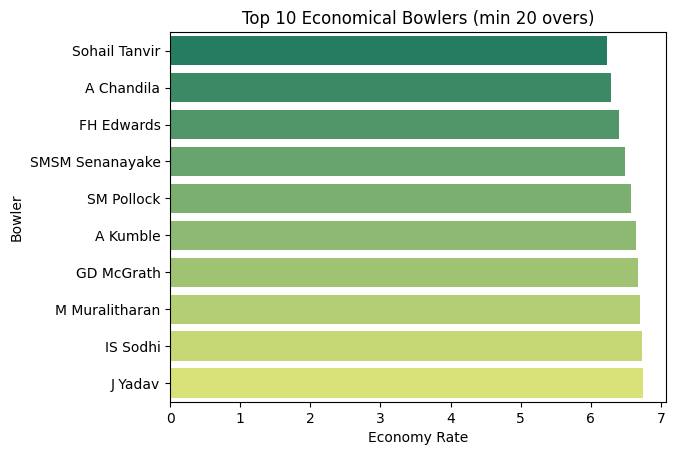

In [118]:
sns.barplot(
    x=top_economy['economy'],
    y=top_economy.index,
    hue=top_economy.index,
    palette='summer',
    dodge=False,
    legend=False
)
plt.title("Top 10 Economical Bowlers (min 20 overs)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.show()

# 5.Head-to-Head Matchups

In [119]:
batter = "V Kohli"
bowler = "JJ Bumrah"

head_to_head = deliveries[(deliveries['batter'] == batter) & (deliveries['bowler'] == bowler)]


Batting Performance vs Bowler

In [120]:
total_runs = head_to_head['batsman_runs'].sum()
balls_faced = len(head_to_head)
dismissals = head_to_head['is_wicket'].sum()
strike_rate = (total_runs / balls_faced) * 100 if balls_faced > 0 else 0

print(f"{batter} vs {bowler}:")
print(f"Total Runs Scored: {total_runs}")
print(f"Balls Faced: {balls_faced}")
print(f"Dismissals: {dismissals}")
print(f"Strike Rate: {strike_rate:.2f}")

V Kohli vs JJ Bumrah:
Total Runs Scored: 145
Balls Faced: 98
Dismissals: 5
Strike Rate: 147.96


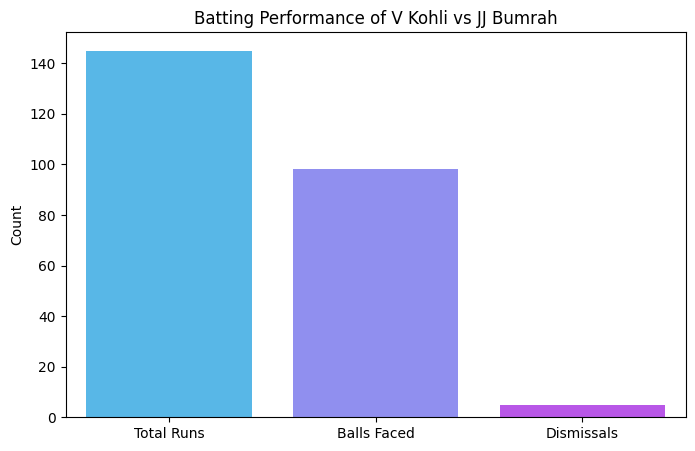

In [121]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=['Total Runs', 'Balls Faced', 'Dismissals'],
    y=[total_runs, balls_faced, dismissals],
    hue=['Total Runs', 'Balls Faced', 'Dismissals'],
    palette="cool",
    dodge=False,
    legend=False
)
plt.title(f"Batting Performance of {batter} vs {bowler}")
plt.ylabel("Count")
plt.show()

Bowler Performance vs Batting

In [122]:
# Calculate economy rate
if balls_faced > 0:
    economy_rate = head_to_head['total_runs'].sum() / (balls_faced / 6)
else:
    economy_rate = 0

# Bowler performance
print(f"\n{bowler}'s Performance vs {batter}:")
print(f"Economy Rate: {economy_rate:.2f}")

# Dismissal breakdown
dismissal_kinds = head_to_head[head_to_head['is_wicket'] == 1]['dismissal_kind'].value_counts()
print("Valid Dismissal Types:")
print(dismissal_kinds)


JJ Bumrah's Performance vs V Kohli:
Economy Rate: 9.12
Valid Dismissal Types:
dismissal_kind
caught    3
lbw       2
Name: count, dtype: int64


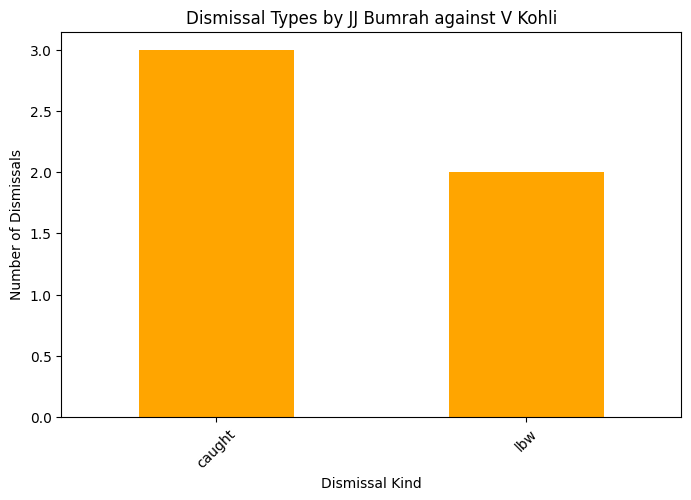

In [123]:
plt.figure(figsize=(8, 5))
dismissal_kinds.plot(kind='bar', color='orange', title=f"Dismissal Types by {bowler} against {batter}")
plt.ylabel("Number of Dismissals")
plt.xlabel("Dismissal Kind")
plt.xticks(rotation=45)
plt.show()

-------

# Team Performance
# 1.Wins and Losses by Teams

In [124]:
wins = matches['winner'].value_counts()
total_matches = pd.concat([matches['team1'], matches['team2']]).value_counts()
losses = total_matches - wins

team_results = pd.DataFrame({
    'Wins': wins,
    'Losses': losses
}).fillna(0).astype(int)

team_results

,Wins,Losses
Chennai Super Kings,138,100
Deccan Chargers,29,46
Delhi Capitals,115,137
Gujarat Lions,13,17
Gujarat Titans,28,17
Kochi Tuskers Kerala,6,8
Kolkata Knight Riders,131,120
Lucknow Super Giants,24,20
Mumbai Indians,144,117
No_Winner,5,0


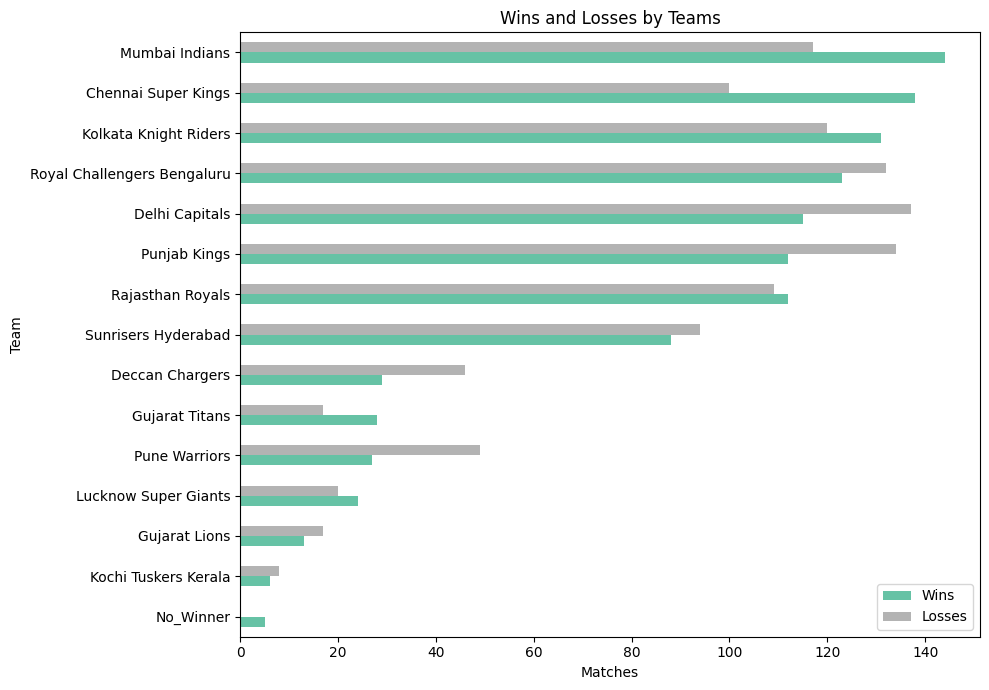

In [125]:
team_results.sort_values('Wins', ascending=True).plot(kind='barh', figsize=(10, 7), colormap='Set2')
plt.title("Wins and Losses by Teams")
plt.xlabel("Matches")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

# 2.Total Runs Scored by Teams

In [126]:
total_runs_by_team = deliveries.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

total_runs_by_team


batting_team
Mumbai Indians                 42176
Royal Challengers Bengaluru    40622
Punjab Kings                   39600
Kolkata Knight Riders          39331
Delhi Capitals                 39196
Chennai Super Kings            38629
Rajasthan Royals               34747
Sunrisers Hyderabad            29071
Deccan Chargers                11463
Pune Warriors                  10891
Gujarat Titans                  7757
Lucknow Super Giants            7510
Gujarat Lions                   4862
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64

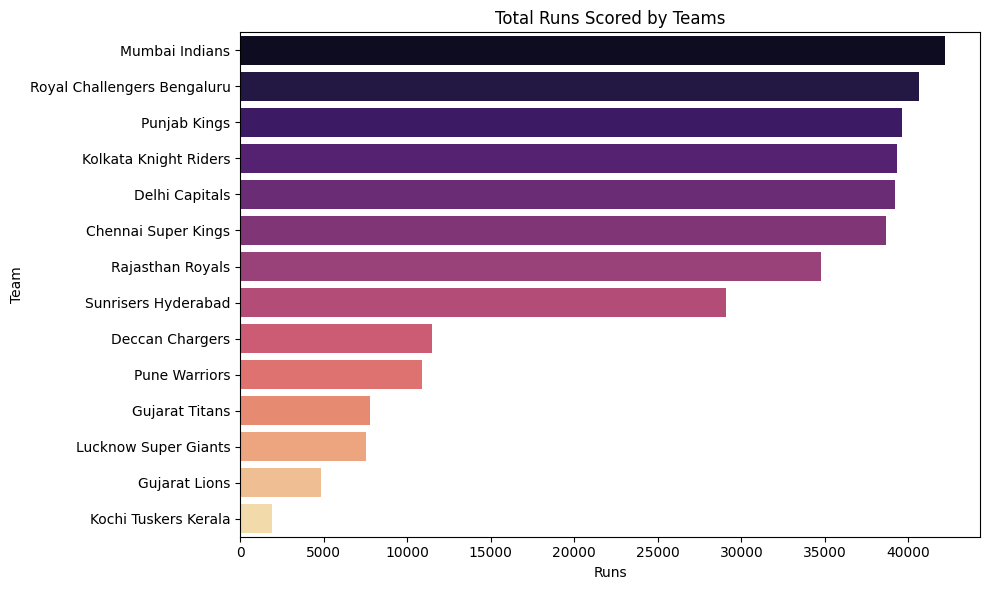

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=total_runs_by_team.values,
    y=total_runs_by_team.index,
    hue=total_runs_by_team.index,
    palette='magma',
    dodge=False,
    legend=False
)

plt.title("Total Runs Scored by Teams")
plt.xlabel("Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

# 3.Average Runs Per Match Per Team

In [128]:
runs_per_team = deliveries.groupby('batting_team')['total_runs'].sum()
matches_per_team = pd.concat([matches['team1'], matches['team2']]).value_counts()

avg_runs_per_match = (runs_per_team / matches_per_team).sort_values(ascending=False)
avg_runs_per_match

Gujarat Titans                 172.377778
Lucknow Super Giants           170.681818
Chennai Super Kings            162.306723
Gujarat Lions                  162.066667
Mumbai Indians                 161.593870
Punjab Kings                   160.975610
Sunrisers Hyderabad            159.730769
Royal Challengers Bengaluru    159.301961
Rajasthan Royals               157.226244
Kolkata Knight Riders          156.697211
Delhi Capitals                 155.539683
Deccan Chargers                152.840000
Pune Warriors                  143.302632
Kochi Tuskers Kerala           135.785714
dtype: float64

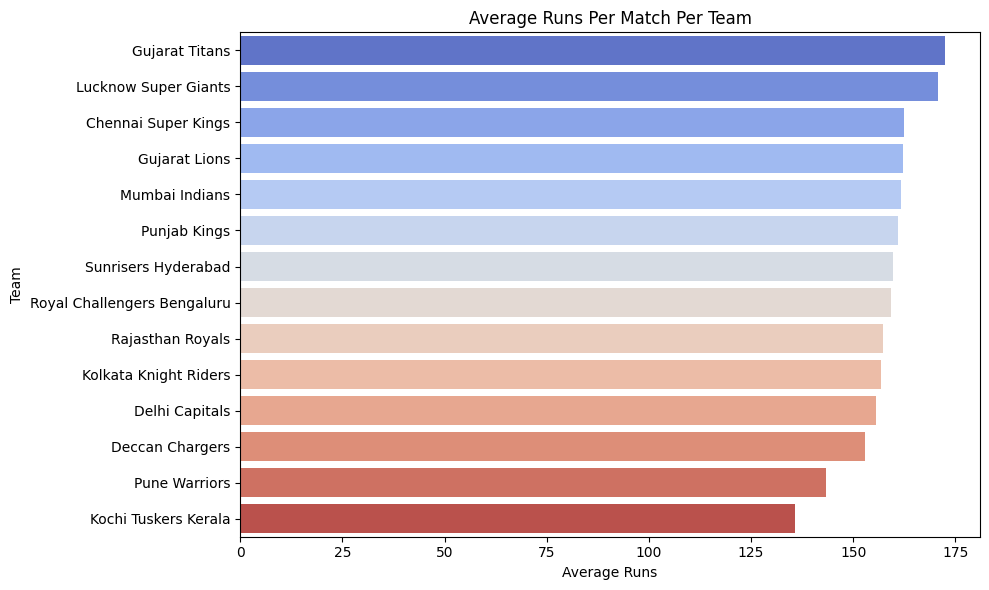

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_runs_per_match.values,
    y=avg_runs_per_match.index,
    hue=avg_runs_per_match.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title("Average Runs Per Match Per Team")
plt.xlabel("Average Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

# 4.Total matches , Winned matches and Percentage

In [130]:
team_summary = pd.DataFrame({
    'Total Matches': matches_per_team,
    'Wins': wins
}).fillna(0)

team_summary['Win Percentage'] = (team_summary['Wins'] / team_summary['Total Matches']) * 100
team_summary = team_summary.sort_values('Win Percentage', ascending=False)

print("Team Summary: Total Matches, Wins, Win Percentage")
team_summary.round(2)

Team Summary: Total Matches, Wins, Win Percentage


,Total Matches,Wins,Win Percentage
No_Winner,0.0,5,inf
Gujarat Titans,45.0,28,62.22
Chennai Super Kings,238.0,138,57.98
Mumbai Indians,261.0,144,55.17
Lucknow Super Giants,44.0,24,54.55
Kolkata Knight Riders,251.0,131,52.19
Rajasthan Royals,221.0,112,50.68
Sunrisers Hyderabad,182.0,88,48.35
Royal Challengers Bengaluru,255.0,123,48.24
Delhi Capitals,252.0,115,45.63


# 5.Home vs Away Performance

In [131]:
home_wins = matches[matches['team1'] == matches['winner']]['team1'].value_counts()
away_wins = matches[matches['team2'] == matches['winner']]['team2'].value_counts()

home_vs_away = pd.DataFrame({
    'Home Wins': home_wins,
    'Away Wins': away_wins
}).fillna(0).astype(int)

home_vs_away


,Home Wins,Away Wins
Chennai Super Kings,75,63
Deccan Chargers,13,16
Delhi Capitals,61,54
Gujarat Lions,5,8
Gujarat Titans,11,17
Kochi Tuskers Kerala,3,3
Kolkata Knight Riders,65,66
Lucknow Super Giants,16,8
Mumbai Indians,70,74
Pune Warriors,13,14


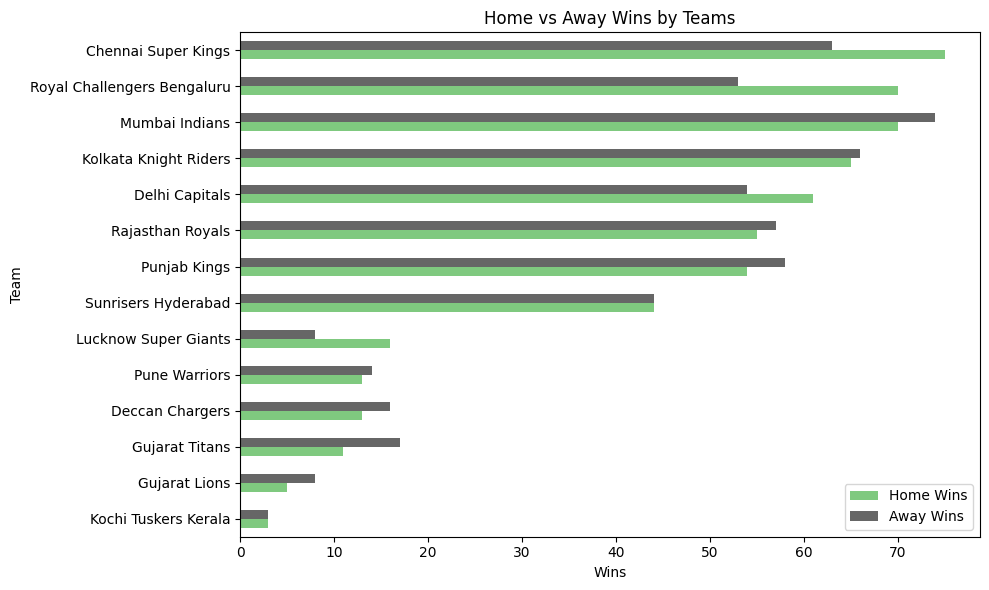

In [132]:
home_vs_away.sort_values('Home Wins', ascending=True).plot(kind='barh', figsize=(10, 6), colormap='Accent')
plt.title("Home vs Away Wins by Teams")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

---
# VENUE & CITY INSIGHTS

# 1.Top 10 Cities with Most Matches

In [133]:
venue_counts = matches['city'].value_counts().head(10)
venue_counts


city
Mumbai        173
Kolkata        93
Delhi          90
Chennai        85
Hyderabad      77
Bangalore      65
Chandigarh     61
Jaipur         57
Pune           51
Dubai          46
Name: count, dtype: int64

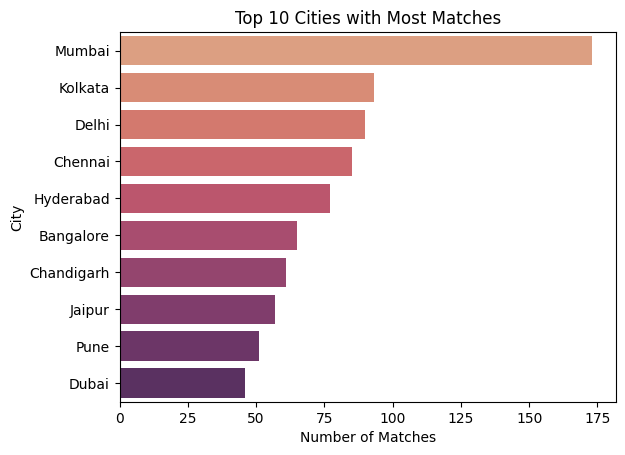

In [134]:
sns.barplot(
    x=venue_counts.values,
    y=venue_counts.index,
    hue=venue_counts.index,
    palette="flare",
    legend=False             
)
plt.title("Top 10 Cities with Most Matches")
plt.xlabel("Number of Matches")
plt.ylabel("City")
plt.show()

# 2.Team Wins per Venue

In [135]:
venue_team_wins = matches.groupby(['venue', 'winner']).size().unstack(fill_value=0)
venue_team_wins

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,No_Winner,Pune Warriors,Punjab Kings,Rajasthan Royals,Royal Challengers Bengaluru,Sunrisers Hyderabad
venue,,,,,,,,,,,,,,,
Arun Jaitley Stadium,1,0,8,0,0,0,0,0,1,0,0,1,0,1,2
"Arun Jaitley Stadium, Delhi",2,0,6,0,1,0,0,0,3,0,0,1,1,0,2
Barabati Stadium,0,3,0,0,0,0,3,0,0,0,0,1,0,0,0
"Barsapara Cricket Stadium, Guwahati",0,0,0,0,0,0,0,0,0,0,0,2,1,0,0
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",0,0,1,0,1,0,1,7,0,1,0,1,1,1,0
Brabourne Stadium,1,0,0,0,0,0,0,0,5,0,0,0,2,1,1
"Brabourne Stadium, Mumbai",0,0,4,0,2,0,0,2,2,0,0,2,3,0,2
Buffalo Park,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
De Beers Diamond Oval,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


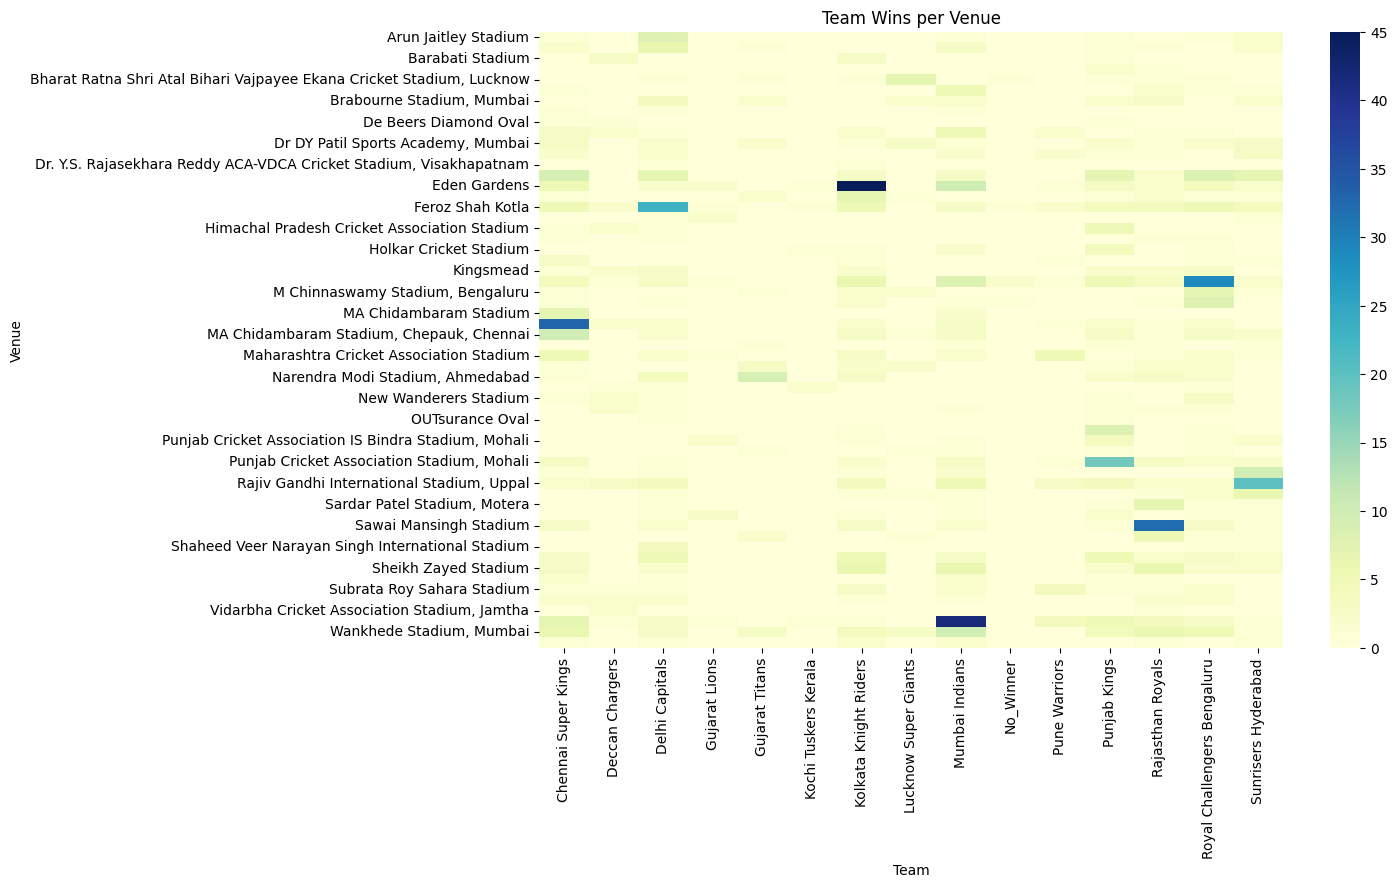

In [136]:
plt.figure(figsize=(12, 8))
sns.heatmap(venue_team_wins, cmap="YlGnBu")
plt.title("Team Wins per Venue")
plt.xlabel("Team")
plt.ylabel("Venue")
plt.show()

----
# STATISTICAL ANALYSIS
# 1. Correlation between Toss Decision and Match Win

In [137]:
from scipy.stats import pearsonr
matches['toss_decision_encoded'] = matches['toss_decision'].map({'bat': 1, 'field': 0})
matches['won_match'] = (matches['toss_winner'] == matches['winner']).astype(int)
correlation, p_value = pearsonr(matches['toss_decision_encoded'], matches['won_match'])
print(f"Toss Decision vs Match Win Correlation: {correlation:.2f} (p-value: {p_value:.4f})")


Toss Decision vs Match Win Correlation: -0.08 (p-value: 0.0086)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21480\1115559689.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Field', 'Bat'], y=matches.groupby('toss_decision_encoded')['won_match'].mean().values, palette="Set2")


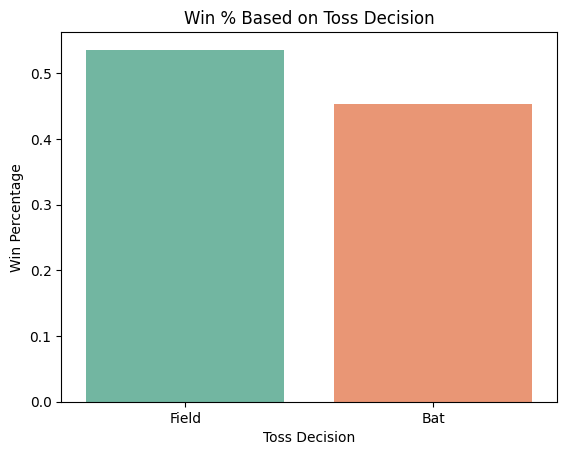

In [138]:
sns.barplot(x=['Field', 'Bat'], y=matches.groupby('toss_decision_encoded')['won_match'].mean().values, palette="Set2")
plt.title("Win % Based on Toss Decision")
plt.ylabel("Win Percentage")
plt.xlabel("Toss Decision")
plt.show()

# 2. Correlation: Total Runs vs Match Win

In [139]:
team_runs = deliveries.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()
match_winners = matches[['id', 'winner']]
team_runs = team_runs.merge(match_winners, on='id')
team_runs['won'] = (team_runs['batting_team'] == team_runs['winner']).astype(int)
run_win_corr, run_win_p = pearsonr(team_runs['total_runs'], team_runs['won'])
print(f"Total Runs vs Match Win Correlation: {run_win_corr:.2f} (p-value: {run_win_p:.4f})")

Total Runs vs Match Win Correlation: 0.23 (p-value: 0.0000)


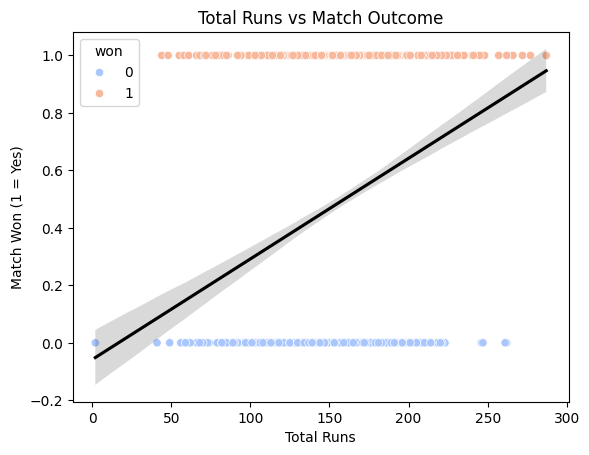

In [140]:
sns.scatterplot(data=team_runs, x='total_runs', y='won', hue='won', palette='coolwarm')
sns.regplot(data=team_runs, x='total_runs', y='won', scatter=False, color='black')
plt.title("Total Runs vs Match Outcome")
plt.xlabel("Total Runs")
plt.ylabel("Match Won (1 = Yes)")
plt.show()

# 3. Linear Regression: Runs vs Win Probability

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = team_runs[['total_runs']]
y = team_runs['won']
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)
print(f"Regression Equation: won = {reg.coef_[0]:.4f} * total_runs + {reg.intercept_:.4f}")
print(f"R² Score: {r2:.4f}")

Regression Equation: won = 0.0035 * total_runs + -0.0584
R² Score: 0.0521


# 4. Season-wise Match Frequency Trend

In [142]:
season_trend = matches.groupby('Season').size()
season_trend

Season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
2023    74
2024    71
dtype: int64

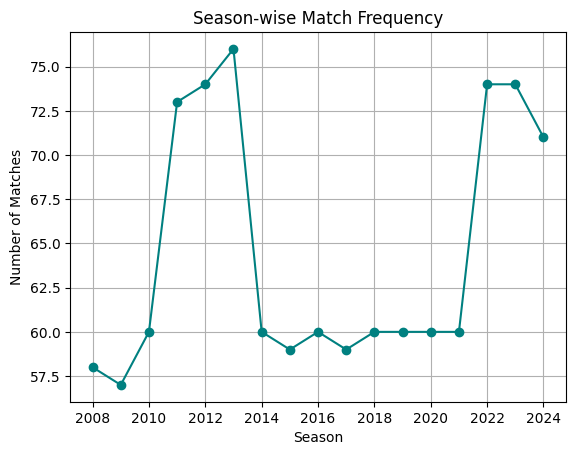

In [143]:
season_trend.plot(marker='o', color='teal')
plt.title("Season-wise Match Frequency")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.show()

-------
# CLUSTERING ANALYSIS
# 1. Clustering Teams Based on Performance

In [144]:
from sklearn.cluster import KMeans

team_stats = matches.groupby('winner').agg(matches_won=('id', 'count'))
total_scores = deliveries.groupby('batting_team')['total_runs'].sum()
team_stats = team_stats.join(total_scores)
team_stats = team_stats.dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(team_stats)
team_stats['cluster'] = kmeans.labels_
team_stats

,matches_won,total_runs,cluster
winner,,,
Chennai Super Kings,138,38629.0,1
Deccan Chargers,29,11463.0,2
Delhi Capitals,115,39196.0,1
Gujarat Lions,13,4862.0,0
Gujarat Titans,28,7757.0,2
Kochi Tuskers Kerala,6,1901.0,0
Kolkata Knight Riders,131,39331.0,1
Lucknow Super Giants,24,7510.0,2
Mumbai Indians,144,42176.0,1


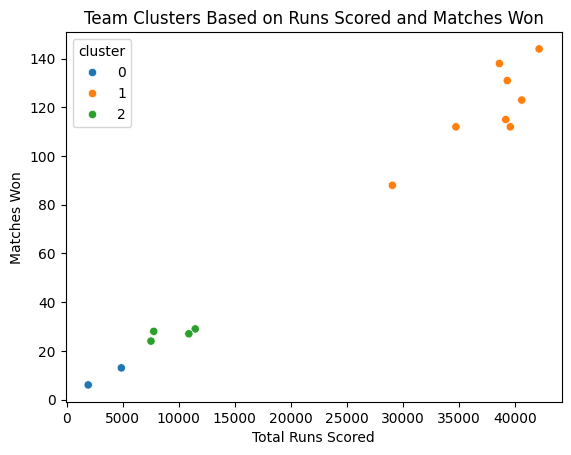

In [145]:
sns.scatterplot(x='total_runs', y='matches_won', hue='cluster', data=team_stats, palette='tab10')
plt.title("Team Clusters Based on Runs Scored and Matches Won")
plt.xlabel("Total Runs Scored")
plt.ylabel("Matches Won")
plt.show()

# 2. Clustering Batsmen by Strike Rate and Average

In [146]:
batsman_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('is_wicket', 'sum')
)
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100


batsman_stats['average'] = batsman_stats['total_runs'] / batsman_stats['dismissals'].replace(0, np.nan)
batsmen_filtered = batsman_stats.dropna(subset=['average']).copy()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(batsmen_filtered[['strike_rate', 'average']])
batsmen_filtered['cluster'] = kmeans.labels_

batsmen_filtered

,total_runs,balls_faced,dismissals,strike_rate,average,cluster
batter,,,,,,
A Ashish Reddy,280,196,15,142.857143,18.666667,0
A Badoni,634,505,26,125.544554,24.384615,0
A Chandila,4,7,1,57.142857,4.000000,1
A Chopra,53,75,5,70.666667,10.600000,2
A Choudhary,25,20,2,125.000000,12.500000,0
...,...,...,...,...,...,...
Yashpal Singh,47,67,4,70.149254,11.750000,2
Younis Khan,3,7,1,42.857143,3.000000,1
Yudhvir Singh,22,16,4,137.500000,5.500000,0


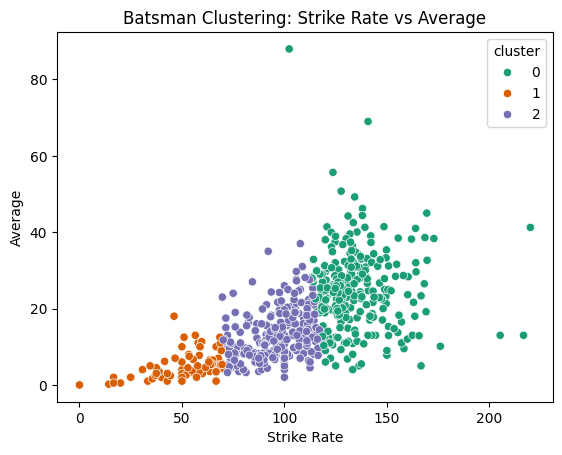

In [147]:
sns.scatterplot(x='strike_rate', y='average', hue='cluster', data=batsmen_filtered, palette='Dark2')
plt.title("Batsman Clustering: Strike Rate vs Average")
plt.xlabel("Strike Rate")
plt.ylabel("Average")
plt.show()


# 3. Clustering Bowlers by Economy and Wickets

In [148]:
bowler_stats = bowler_stats.dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(bowler_stats[['economy', 'wickets']])
bowler_stats['cluster'] = kmeans.labels_
bowler_stats

,runs_conceded,balls_bowled,wickets,economy,cluster
bowler,,,,,
A Ashish Reddy,400,270,19,8.888889,0
A Chandila,245,234,11,6.282051,0
A Kumble,1089,983,49,6.646999,2
A Mishra,4193,3444,183,7.304878,1
A Mithun,477,312,8,9.173077,0
...,...,...,...,...,...
YS Chahal,4681,3628,213,7.741455,1
Yash Dayal,933,615,31,9.102439,0
Yash Thakur,702,432,27,9.750000,0


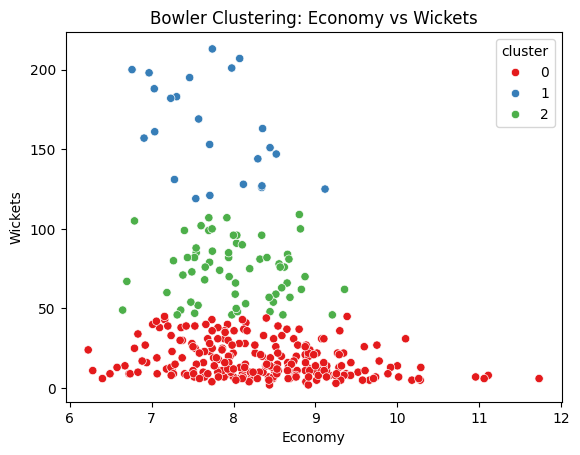

In [149]:
sns.scatterplot(x='economy', y='wickets', hue='cluster', data=bowler_stats, palette='Set1')
plt.title("Bowler Clustering: Economy vs Wickets")
plt.xlabel("Economy")
plt.ylabel("Wickets")
plt.show()

# 4. Clustering Matches by Score Pattern

In [150]:
# First, create the columns if they don't already exist
matches['win_by_runs'] = 0
matches['win_by_wickets'] = 0

# Assign values by explicitly casting to int
matches.loc[matches['result'] == 'runs', 'win_by_runs'] = matches.loc[matches['result'] == 'runs', 'result_margin'].astype(int)
matches.loc[matches['result'] == 'wickets', 'win_by_wickets'] = matches.loc[matches['result'] == 'wickets', 'result_margin'].astype(int)



matches['total_score'] = np.random.randint(120, 220, size=len(matches))  # or actual score if you have it
matches['win_margin'] = matches['win_by_runs'] + matches['win_by_wickets']

features = matches[['total_score', 'win_margin']].fillna(0)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
matches['cluster'] = kmeans.labels_



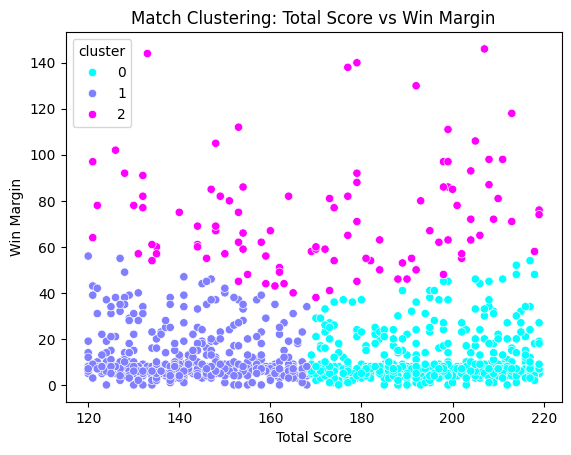

In [151]:
# Plot
sns.scatterplot(x='total_score', y='win_margin', hue='cluster', data=matches, palette='cool')
plt.title("Match Clustering: Total Score vs Win Margin")
plt.xlabel("Total Score")
plt.ylabel("Win Margin")
plt.show()

-------
# Simple Linear Regression : Predict 
# 1. Predict Total Runs based on Balls Faced

In [152]:
batting_df = deliveries.groupby('batter').agg({
    'ball': 'count',
    'total_runs': 'sum'
}).reset_index().rename(columns={'ball': 'balls_faced'})

X = batting_df[['balls_faced']]
y = batting_df['total_runs']

model1=LinearRegression()
model1.fit(X, y)


LinearRegression()

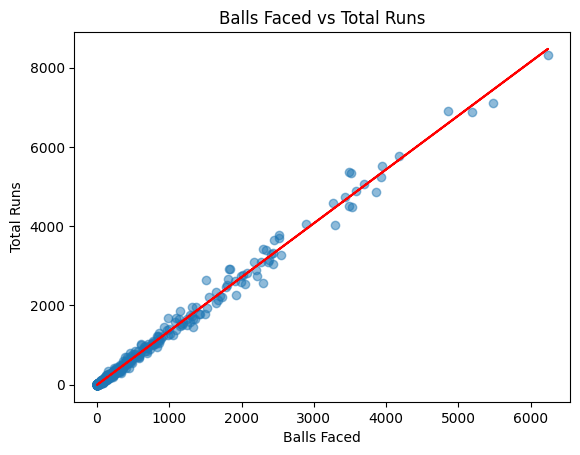

In [153]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model1.predict(X), color='red')
plt.title('Balls Faced vs Total Runs')
plt.xlabel('Balls Faced')
plt.ylabel('Total Runs')
plt.show()

Prediction

In [154]:
balls_faced_input = 45
input_df1 = pd.DataFrame({'balls_faced': [balls_faced_input]})
predicted_total_runs_batter = model1.predict(input_df1)
print("Predicted Total Runs by Batter (Balls Faced):", predicted_total_runs_batter[0])

Predicted Total Runs by Batter (Balls Faced): 50.50977665064911


# 2.Balls Bowled vs Wickets Taken

In [155]:
bowling_df = deliveries.groupby('bowler').agg({
    'ball': 'count',
    'is_wicket': 'sum'
}).reset_index().rename(columns={'ball': 'balls_bowled', 'is_wicket': 'wickets'})

X = bowling_df[['balls_bowled']]
y = bowling_df['wickets']

model2 = LinearRegression()
model2.fit(X, y)

LinearRegression()

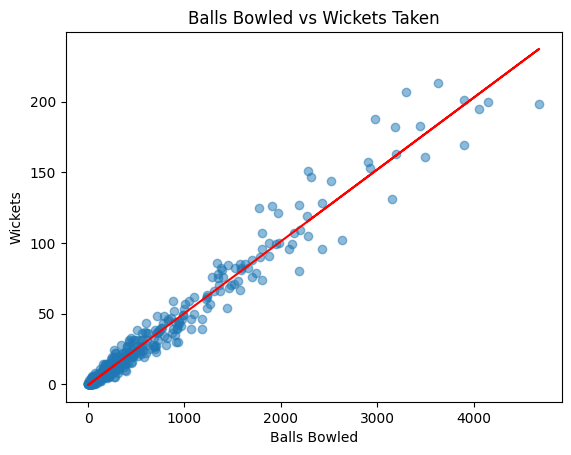

In [156]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model2.predict(X), color='red')
plt.title('Balls Bowled vs Wickets Taken')
plt.xlabel('Balls Bowled')
plt.ylabel('Wickets')
plt.show()

Prediction

In [157]:
balls_bowled_input = 90
input_df2 = pd.DataFrame({'balls_bowled': [balls_bowled_input]})
predicted_wickets_bowler = model2.predict(input_df2)
print("Predicted Wickets by Bowler (Balls Bowled):", predicted_wickets_bowler[0])

Predicted Wickets by Bowler (Balls Bowled): 3.977551194225228


# 3. Overs vs Total Runs 

In [158]:
inning_df = deliveries.groupby(['id', 'inning']).agg({
    'over': 'max',
    'total_runs': 'sum'
}).reset_index().rename(columns={'over': 'total_overs'})

X = inning_df[['total_overs']]
y = inning_df['total_runs']

model3 = LinearRegression()
model3.fit(X, y)


LinearRegression()

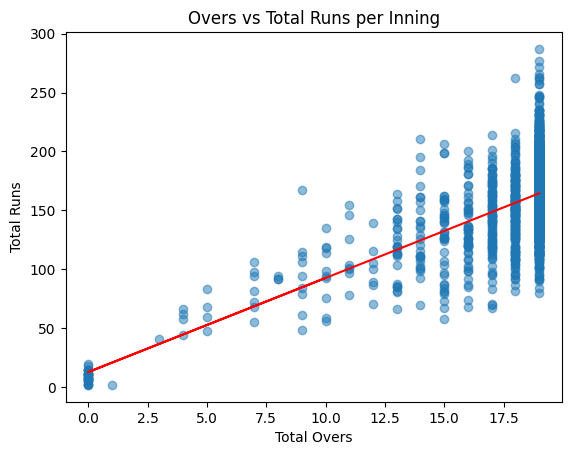

In [159]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model3.predict(X), color='red')
plt.title('Overs vs Total Runs per Inning')
plt.xlabel('Total Overs')
plt.ylabel('Total Runs')
plt.show()

Prediction

In [160]:
total_overs_input = 18
input_df3 = pd.DataFrame({'total_overs': [total_overs_input]})
predicted_total_runs_overs = model3.predict(input_df3)
print("Predicted Total Runs (Total Overs):", predicted_total_runs_overs[0])

Predicted Total Runs (Total Overs): 156.54564161188912


 # 4. Extras vs Total Runs

In [161]:
match_df = deliveries.groupby('id').agg({
    'extra_runs': 'sum',
    'total_runs': 'sum'
}).reset_index()

X = match_df[['extra_runs']]
y = match_df['total_runs']

model4= LinearRegression()
model4.fit(X, y)


LinearRegression()

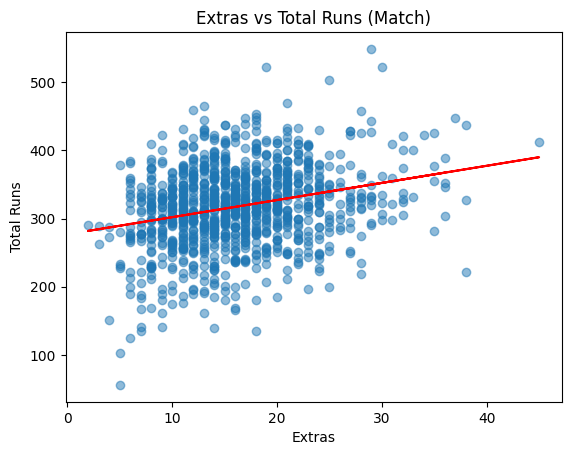

In [162]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model4.predict(X), color='red')
plt.title('Extras vs Total Runs (Match)')
plt.xlabel('Extras')
plt.ylabel('Total Runs')
plt.show()

Prediction

In [163]:
extra_runs_input = 30
input_df4 = pd.DataFrame({'extra_runs': [extra_runs_input]})
predicted_total_runs_extras = model4.predict(input_df4)
print("Predicted Total Runs (Extras):", predicted_total_runs_extras[0])

Predicted Total Runs (Extras): 352.3888207619722


# 5. Total Runs Conceded vs Wickets

In [164]:
bowling_stats = deliveries.groupby('bowler').agg({
    'total_runs': 'sum',
    'is_wicket': 'sum'
}).reset_index().rename(columns={'is_wicket': 'wickets'})

X = bowling_stats[['total_runs']]
y = bowling_stats['wickets']

model5 = LinearRegression()
model5.fit(X, y)

LinearRegression()

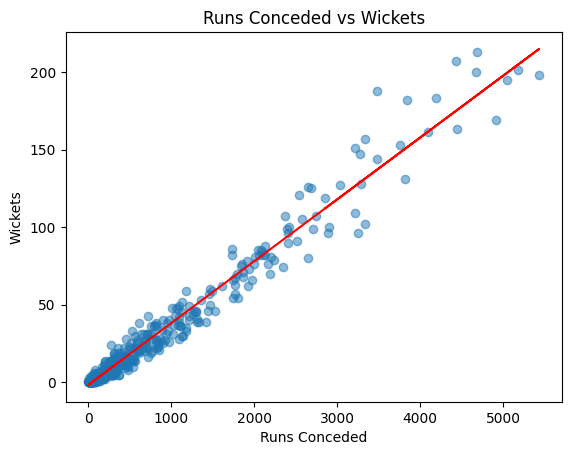

In [165]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model5.predict(X), color='red')
plt.title('Runs Conceded vs Wickets')
plt.xlabel('Runs Conceded')
plt.ylabel('Wickets')
plt.show()

Prediction

In [166]:
runs_conceded_input = 80
input_df5 = pd.DataFrame({'total_runs': [runs_conceded_input]})  # Use 'total_runs' as used during model fitting
predicted_wickets_runs = model5.predict(input_df5)
print("Predicted Wickets (Runs Conceded):", predicted_wickets_runs[0])

Predicted Wickets (Runs Conceded): 1.4767078555161284


# 6. Runs per Ball vs Wickets

In [167]:
# Create runs per ball first
bowling_stats['balls'] = deliveries.groupby('bowler')['ball'].count().values
bowling_stats['runs_per_ball'] = bowling_stats['total_runs'] / bowling_stats['balls']

X = bowling_stats[['runs_per_ball']]
y = bowling_stats['wickets']

model6 = LinearRegression()
model6.fit(X, y)


LinearRegression()

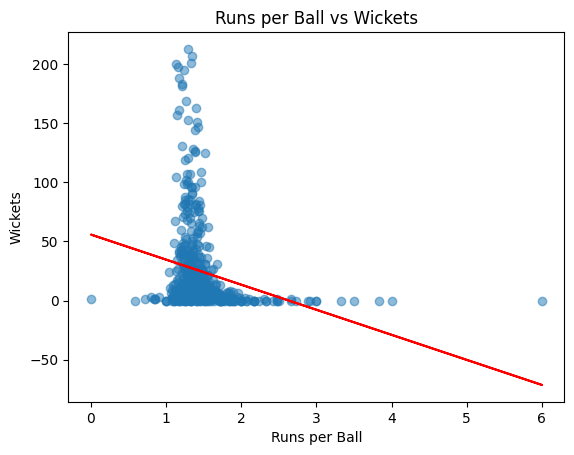

In [168]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model6.predict(X), color='red')
plt.title('Runs per Ball vs Wickets')
plt.xlabel('Runs per Ball')
plt.ylabel('Wickets')
plt.show()

Prediction

In [169]:
runs_per_ball_input = 1
input_df6 = pd.DataFrame({'runs_per_ball': [runs_per_ball_input]})
predicted_wickets_rpb = model6.predict(input_df6)
print("Predicted Wickets (Runs per Ball):", predicted_wickets_rpb[0])


Predicted Wickets (Runs per Ball): 34.64870342607328


----------
# Multiple Linear Regression

# 1. Predict Total Runs Based on Balls Faced & Batting Strike Rate

In [170]:
model7 = LinearRegression()
batter_stats = deliveries.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

batter_stats.rename(columns={'batsman_runs': 'total_runs', 'ball': 'balls_faced'}, inplace=True)
batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['balls_faced']) * 100

X1 = batter_stats[['balls_faced', 'strike_rate']]
y1 = batter_stats['total_runs']
model7.fit(X1, y1)


LinearRegression()

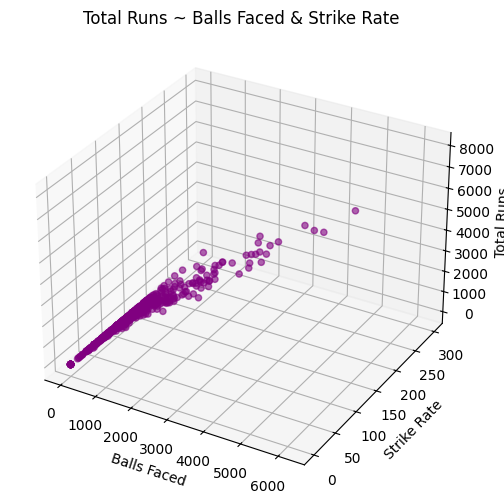

In [171]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1['balls_faced'], X1['strike_rate'], y1, c='purple', alpha=0.6)
ax.set_xlabel('Balls Faced')
ax.set_ylabel('Strike Rate')
ax.set_zlabel('Total Runs')
plt.title('Total Runs ~ Balls Faced & Strike Rate')
plt.show()

Prediction

In [172]:
sample_input = pd.DataFrame({'balls_faced': [10], 'strike_rate': [135]})
predicted_runs = model7.predict(sample_input)
print("Predicted Total Runs:", predicted_runs[0])

Predicted Total Runs: 18.25306337379442


# 2.Predict Bowler's Wickets Based on Economy Rate & Balls Bowled

In [173]:
model8 = LinearRegression()
X2 = bowler_stats[['economy', 'balls_bowled']]
y2 = bowler_stats['wickets']
model8.fit(X2, y2)

LinearRegression()

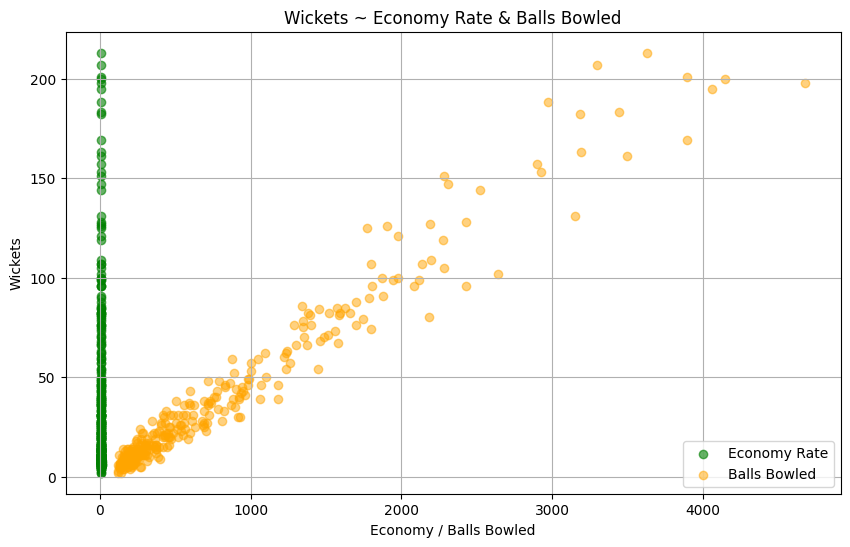

In [174]:
plt.figure(figsize=(10, 6))
plt.scatter(X2['economy'], y2, color='green', label='Economy Rate', alpha=0.6)
plt.scatter(X2['balls_bowled'], y2, color='orange', label='Balls Bowled', alpha=0.5)
plt.xlabel('Economy / Balls Bowled')
plt.ylabel('Wickets')
plt.title('Wickets ~ Economy Rate & Balls Bowled')
plt.legend()
plt.grid(True)
plt.show()

Prediction

In [175]:
input_data = pd.DataFrame({'economy': [10], 'balls_bowled': [24]})
predicted_wickets = model8.predict(input_data)
print("Predicted Wickets:", predicted_wickets[0])

Predicted Wickets: 2.3832295499245877


----
# Model Evaluation

# 1.R² (Coefficient of Determination) and Standard Error of Estimate (SEE)

In [176]:
# --- Model 7: Batter's Total Runs Prediction ---

from sklearn.metrics import mean_squared_error

y1_pred = model7.predict(X1)

# R² Score
r2_model7 = r2_score(y1, y1_pred)

# Standard Error of Estimate (SEE)
see_model7 = np.sqrt(mean_squared_error(y1, y1_pred))

print("\nBatter Runs Prediction Model:")
print(f"R² Score: {r2_model7:.4f}")
print(f"Standard Error of Estimate: {see_model7:.4f}")


Batter Runs Prediction Model:
R² Score: 0.9936
Standard Error of Estimate: 83.1596


In [177]:
# --- Model 8: Bowler's Wickets Prediction ---

y2_pred = model8.predict(X2)

# R² Score
r2_model8 = r2_score(y2, y2_pred)

# Standard Error of Estimate (SEE)
see_model8 = np.sqrt(mean_squared_error(y2, y2_pred))

print("\nBowler Wickets Prediction Model:")
print(f"R² Score: {r2_model8:.4f}")
print(f"Standard Error of Estimate: {see_model8:.4f}")


Bowler Wickets Prediction Model:
R² Score: 0.9587
Standard Error of Estimate: 8.9449


# 2. Regression Toward the Mean (RTM)

In [178]:
top_batters = batter_stats.sort_values(by='total_runs', ascending=False).head(10)
top_batters_pred = model7.predict(top_batters[['balls_faced', 'strike_rate']])

print("\nRegression Toward the Mean (Top Batters):")
for i in range(5):
    actual = top_batters.iloc[i]['total_runs']
    predicted = top_batters_pred[i]
    print(f"Actual: {actual:.1f} -> Predicted: {predicted:.1f}")


Regression Toward the Mean (Top Batters):
Actual: 8014.0 -> Predicted: 8053.8
Actual: 6769.0 -> Predicted: 7079.1
Actual: 6630.0 -> Predicted: 6694.0
Actual: 6567.0 -> Predicted: 6266.3
Actual: 5536.0 -> Predicted: 5397.3


In [179]:
top_bowlers = bowler_stats.sort_values(by='wickets', ascending=False).head(10)
top_bowlers_pred = model8.predict(top_bowlers[['economy', 'balls_bowled']])

print("\nRegression Toward the Mean (Top Bowlers):")
for i in range(5):
    actual = top_bowlers.iloc[i]['wickets']
    predicted = top_bowlers_pred[i]
    print(f"Actual: {actual:.1f} -> Predicted: {predicted:.1f}")


Regression Toward the Mean (Top Bowlers):
Actual: 213.0 -> Predicted: 184.5
Actual: 207.0 -> Predicted: 167.9
Actual: 201.0 -> Predicted: 198.5
Actual: 200.0 -> Predicted: 209.8
Actual: 198.0 -> Predicted: 237.4


In [180]:
# Top 10 Player of the Match
top_players = matches['player_of_match'].value_counts().head(10).reset_index()
top_players.columns = ['player', 'awards']
top_players.to_csv('top_players.csv', index=False)

# Total wins per team
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']
team_wins.to_csv('team_wins.csv', index=False)

# Toss win vs match win
toss_vs_win = matches[matches['toss_winner'] == matches['winner']]
toss_result = toss_vs_win.groupby('toss_decision').size().reset_index(name='count')
toss_result.to_csv('toss_result.csv', index=False)

# Merge deliveries with matches to get venue info
merged = deliveries.merge(matches[['id', 'venue']], left_on='id', right_on='id')

# Calculate average total runs per venue
venue_scores = merged.groupby('venue')['total_runs'].mean().reset_index()
venue_scores.columns = ['venue', 'average_score']
venue_scores.to_csv('venue_scores.csv', index=False)


In [181]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [182]:
# Group by batsman to calculate total runs
top_batsmen = deliveries.groupby('batter').agg({
    'batsman_runs': ['sum', 'count']
}).reset_index()

top_batsmen.columns = ['batsman', 'total_runs', 'balls_faced']

# Calculate strike rate
top_batsmen['strike_rate'] = (top_batsmen['total_runs'] / top_batsmen['balls_faced']) * 100

# Filter out players who faced very few balls (e.g., less than 200)
top_batsmen = top_batsmen[top_batsmen['balls_faced'] >= 200]

# Sort and save top 10
top_batsmen = top_batsmen.sort_values(by='total_runs', ascending=False).head(10)
top_batsmen.to_csv('top_batsmen.csv', index=False)


In [183]:
# Filter out dismissals to count wickets
wicket_types = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets = deliveries[deliveries['dismissal_kind'].isin(wicket_types)]

top_bowlers = wickets.groupby('bowler').size().reset_index(name='wickets')

# Add total runs conceded and balls bowled
bowler_stats = deliveries.groupby('bowler').agg({
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()

# Merge stats
top_bowlers = top_bowlers.merge(bowler_stats, on='bowler')

# Calculate economy: runs per over (6 balls)
top_bowlers['economy'] = top_bowlers['total_runs'] / (top_bowlers['ball'] / 6)

# Filter out bowlers with too few deliveries
top_bowlers = top_bowlers[top_bowlers['ball'] >= 300]

# Get top 10
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)
top_bowlers = top_bowlers[['bowler', 'wickets', 'economy']]
top_bowlers.to_csv('top_bowlers.csv', index=False)



In [184]:
matches['toss_and_match_win'] = matches.apply(
    lambda row: 'Toss & Match Win' if row['toss_winner'] == row['winner'] else 'Only Toss Win', axis=1
)
matches['toss_decision'] = matches['toss_decision'].str.capitalize()  # Clean labels
matches['toss_and_match_win'].value_counts()
matches[['toss_decision', 'toss_and_match_win']].to_csv('toss_result1.csv', index=False)
